In [1]:
import pandas

datas= pandas.read_csv('Davis.csv', index_col=0)
pandas.get_dummies(datas, columns=['sex'])

,weight,height,repwt,repht,sex_F,sex_M
1,77,182,77.0,180.0,0,1
2,58,161,51.0,159.0,1,0
3,53,161,54.0,158.0,1,0
4,68,177,70.0,175.0,0,1
5,59,157,59.0,155.0,1,0
...,...,...,...,...,...,...
196,74,175,71.0,175.0,0,1
197,83,180,80.0,180.0,0,1
198,81,175,NaN,NaN,0,1
199,90,181,91.0,178.0,0,1


In [2]:
df=pandas.get_dummies(datas, columns=['sex'])
man = (df["sex_F"] <= 0).sum()
women=(df["sex_M"] <= 0).sum()
print(man/women)

0.7857142857142857


In [3]:
from sklearn.model_selection import train_test_split
train, test= train_test_split(df, test_size=0.5, stratify=df['sex_M'])
man = (test["sex_F"] <= 0).sum()
women=(train["sex_M"] <= 0).sum()
print(man/women)

0.7857142857142857


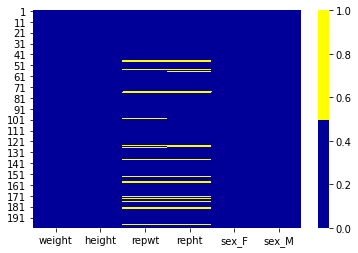

In [4]:
import seaborn as sns
cols = df.columns 
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [5]:
df[cols].describe()

,weight,height,repwt,repht,sex_F,sex_M
count,200.000000,200.000000,183.000000,183.000000,200.000000,200.000000
mean,65.800000,170.020000,65.622951,168.497268,0.560000,0.440000
std,15.095009,12.007937,13.776669,9.467048,0.497633,0.497633
min,39.000000,57.000000,41.000000,148.000000,0.000000,0.000000
25%,55.000000,164.000000,55.000000,160.500000,0.000000,0.000000
50%,63.000000,169.500000,63.000000,168.000000,1.000000,0.000000
75%,74.000000,177.250000,73.500000,175.000000,1.000000,1.000000
max,166.000000,197.000000,124.000000,200.000000,1.000000,1.000000


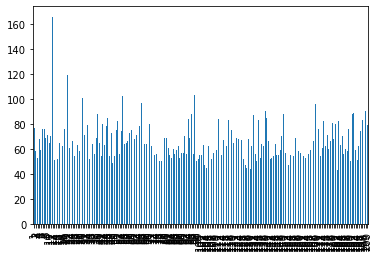

In [6]:
df['weight'].plot.bar()

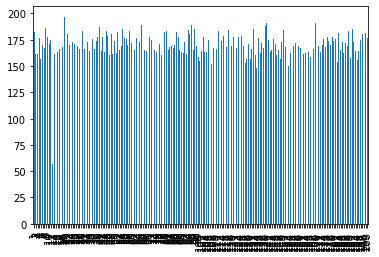

In [7]:
df['height'].plot.bar()


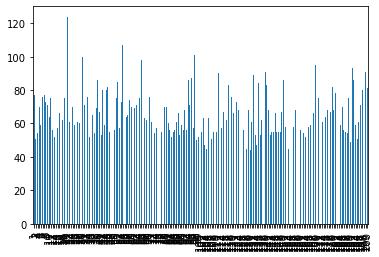

In [8]:
df['repwt'].plot.bar()

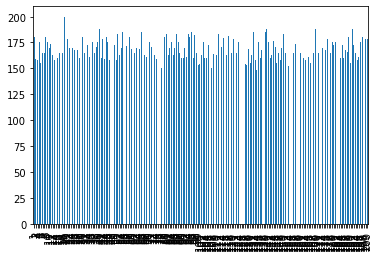

In [9]:
df['repht'].plot.bar()

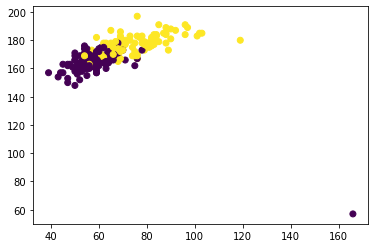

In [10]:
import matplotlib.pyplot as plt
plt.scatter(df["weight"],df['height'], c= df['sex_M'])

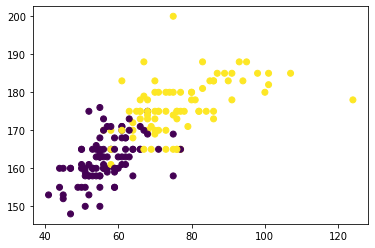

In [11]:
plt.scatter(df['repwt'], df['repht'], c= df['sex_M'])

In [12]:
df = df.drop_duplicates()
df

,weight,height,repwt,repht,sex_F,sex_M
1,77,182,77.0,180.0,0,1
2,58,161,51.0,159.0,1,0
3,53,161,54.0,158.0,1,0
4,68,177,70.0,175.0,0,1
5,59,157,59.0,155.0,1,0
...,...,...,...,...,...,...
196,74,175,71.0,175.0,0,1
197,83,180,80.0,180.0,0,1
198,81,175,NaN,NaN,0,1
199,90,181,91.0,178.0,0,1


In [19]:
from scipy import stats
train=train.dropna(axis=0)
train_df=train[(np.abs(stats.zscore(train)) < 3).all(axis=1)]
train_df

,weight,height,repwt,repht,sex_F,sex_M
163,53,162,52.0,158.0,1,0
149,70,173,67.0,170.0,1,0
122,69,167,73.0,165.0,0,1
33,79,173,76.0,173.0,0,1
178,66,170,67.0,165.0,0,1
...,...,...,...,...,...,...
77,50,160,55.0,150.0,1,0
179,81,178,82.0,175.0,0,1
6,76,170,76.0,165.0,0,1
13,51,161,52.0,158.0,1,0


In [20]:
test=test.dropna(axis=0)
test_df=test[(np.abs(stats.zscore(test)) < 3).all(axis=1)]
test_df

,weight,height,repwt,repht,sex_F,sex_M
145,64,171,66.0,171.0,1,0
199,90,181,91.0,178.0,0,1
189,76,183,75.0,180.0,0,1
74,56,163,57.0,159.0,1,0
29,39,157,41.0,153.0,1,0
...,...,...,...,...,...,...
83,53,169,52.0,175.0,1,0
187,60,172,55.0,168.0,1,0
152,47,162,47.0,160.0,1,0
191,88,185,93.0,188.0,0,1


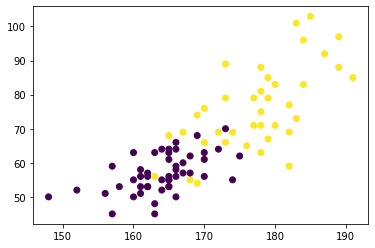

In [21]:
plt.scatter(train_df['height'], train_df['weight'], c= train_df['sex_M'])

# Гистограммы 

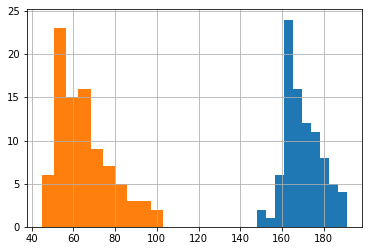

In [22]:
train_df['height'].hist()
train_df["weight"].hist()

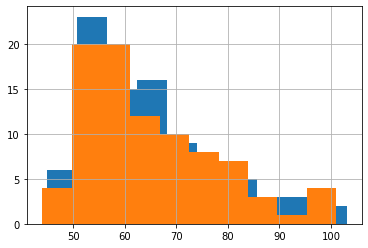

In [25]:
train_df["weight"].hist()
train_df['repwt'].hist()

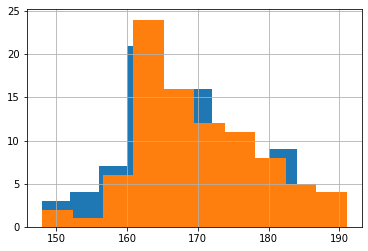

In [24]:
train_df['repht'].hist()
train_df["height"].hist()

# Задание 2


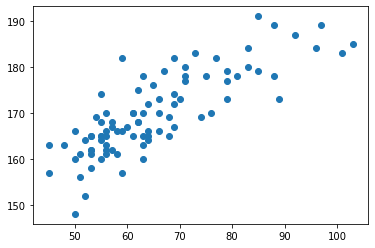

In [26]:
from sklearn.linear_model import LinearRegression
plt.scatter(train_df['weight'], train_df["height"])

In [34]:
lreg=LinearRegression()
reg_h_train=train_df[["height"]].values.astype(np.float)

reg_w_train=train_df['weight'].values.astype(np.float)
print(reg_h_train, reg_w_train )
lreg.fit(reg_h_train, reg_w_train)

[[162.]
 [173.]
 [167.]
 [173.]
 [170.]
 [161.]
 [172.]
 [163.]
 [165.]
 [191.]
 [176.]
 [166.]
 [170.]
 [164.]
 [178.]
 [165.]
 [165.]
 [160.]
 [164.]
 [169.]
 [170.]
 [175.]
 [165.]
 [173.]
 [178.]
 [183.]
 [168.]
 [163.]
 [166.]
 [185.]
 [165.]
 [183.]
 [189.]
 [166.]
 [157.]
 [162.]
 [179.]
 [166.]
 [157.]
 [182.]
 [167.]
 [160.]
 [168.]
 [156.]
 [168.]
 [180.]
 [174.]
 [169.]
 [165.]
 [170.]
 [184.]
 [163.]
 [162.]
 [165.]
 [187.]
 [161.]
 [172.]
 [170.]
 [177.]
 [162.]
 [165.]
 [184.]
 [189.]
 [152.]
 [148.]
 [179.]
 [168.]
 [158.]
 [173.]
 [169.]
 [180.]
 [165.]
 [182.]
 [178.]
 [179.]
 [163.]
 [178.]
 [161.]
 [164.]
 [182.]
 [166.]
 [167.]
 [177.]
 [166.]
 [160.]
 [178.]
 [170.]
 [161.]
 [174.]] [ 53.  70.  69.  79.  66.  56.  64.  48.  64.  85.  65.  50.  63.  55.
  71.  55.  56.  55.  64.  68.  61.  62.  63.  66.  63. 101.  62.  45.
  59. 103.  61.  73.  88.  66.  59.  56.  79.  64.  45.  69.  60.  63.
  62.  51.  55.  83.  55.  74.  55.  61.  96.  63.  57.  53.  92.  58.
  6

LinearRegression()

In [36]:
lreg_pred=lreg.predict(test_df[["height"]])

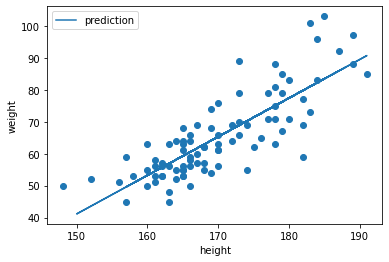

In [38]:
plt.scatter(train_df["height"], train_df['weight'])
plt.plot(test_df["height"], lreg_pred, label="prediction")
plt.xlabel("height")
plt.ylabel("weight")
plt.legend()
plt.show()

In [42]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_df['weight'], lreg_pred)

67.39703119475408

In [43]:
def get_error(w_,predict_w,len_):
    err=[]
    for i in range(len_):
        err.append(1/len_*((w_[i]-predict_w[i])**2))
    return(err)
    

In [48]:
errs=get_error(test_df['weight'].values.astype(np.float),lreg_pred, len(lreg_pred ))


67.3970311947541


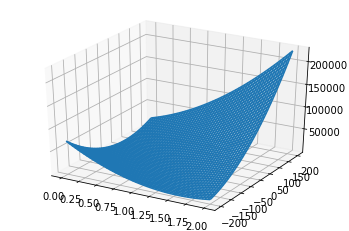

In [61]:
err = []
h_ = train_df['height'].values.astype(np.float)
w_ = train_df['weight'].values.astype(np.float)
for w, b in zip(ww.ravel(),bb.ravel()):
    err.append(1/len(h_) * np.sum((w_ - w * h_ - b)**2))
err = np.array(err)
fig = plt.figure()
ax = fig.add_subplot('111', projection='3d')
ax.plot_wireframe(ww, bb, L.reshape(ww.shape))

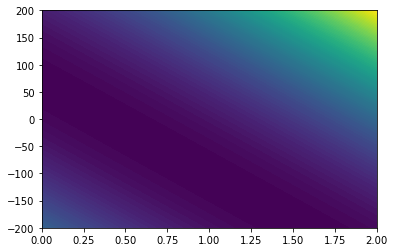

In [62]:
plt.contourf(ww,bb,err.reshape(ww.shape),levels=100)
www = np.linspace(ww.min(),ww.max(),4)
bbb = np.linspace(bb.min(),bb.max(),4)


In [68]:
new_train_df=train_df.drop(["sex_F"], axis=1)
new_train_df=new_train_df.drop(["repwt"], axis=1)
new_train_df=new_train_df.drop(["repht"], axis=1)
new_train_df

,weight,height,sex_M
163,53,162,0
149,70,173,0
122,69,167,1
33,79,173,1
178,66,170,1
...,...,...,...
77,50,160,0
179,81,178,1
6,76,170,1
13,51,161,0


In [74]:
lr_new= LinearRegression()
lr_new.fit(new_train_df.drop(["weight"], axis=1).values.astype(np.float), new_train_df["weight"].values.astype(np.float))

LinearRegression()

In [75]:
new_test_df=test_df.drop(["sex_F"], axis=1)
new_test_df=new_test_df.drop(["repwt"], axis=1)
new_test_df=new_test_df.drop(["repht"], axis=1)
new_test_df

,weight,height,sex_M
145,64,171,0
199,90,181,1
189,76,183,1
74,56,163,0
29,39,157,0
...,...,...,...
83,53,169,0
187,60,172,0
152,47,162,0
191,88,185,1


In [76]:
lr_pred_new=lr_new.predict(new_test_df.drop(["weight"], axis=1).values.astype(np.float))

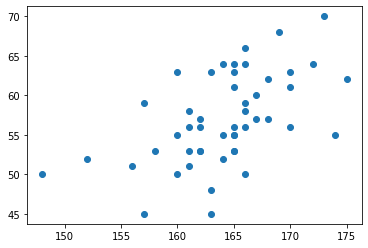

In [88]:
train_df_man = new_train_df.loc[new_train_df['sex_M'] !=1]
test_df_man = new_test_df.loc[new_test_df['sex_M'] !=1]
plt.scatter(train_df_man["height"], train_df_man['weight'])


In [89]:
mean_squared_error(new_test_df['weight'], lr_pred_new)

60.53337896893432